# MI3

## LAMA

In [167]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform

### Exercise 1

In [168]:
first_distribution = np.random.normal(np.array([-0.5,-0.2]).T, 0.1, size =(30,2))
second_distribution = np.random.normal(np.array([0,0.6]).T, 0.1, size =(30,2))
third_distribution = np.random.normal(np.array([0.5,0]).T, 0.1, size =(30,2))

data = np.concatenate((first_distribution,second_distribution,third_distribution), axis = 0)
shuffle = np.random.permutation(data.shape[0])
data_shuffled = data[shuffle]
data_shuffled.shape, np.mean(first_distribution, axis = 0)

((90, 2), array([-0.50624333, -0.1991838 ]))

In [169]:
sigma = 1
distances_squared = pdist(data_shuffled, 'sqeuclidean')    

# Convert pairwise distances into a square matrix.
distances_matrix = squareform(distances_squared)  

# Compute the symmetric kernel matrix.
K = np.exp(-(1/sigma**2) * distances_matrix)

#center the matrix 
n = K.shape[0]
one_n = np.ones((n, n)) / n
K_centered = K - np.dot(one_n, K) - np.dot(K, one_n) + np.dot(np.dot(one_n, K), one_n)


eigen_values, eigen_vectors = np.linalg.eig(K_centered) #solve transformed eigenvalue problem
# eigen_vectors_norm = eigen_vectors/np.linalg.norm(eigen_vectors) #normalize eigenvectors

#sort the eigenvectors and eigenvalues
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:,sorted_indices]


## (C)

(20, 15)

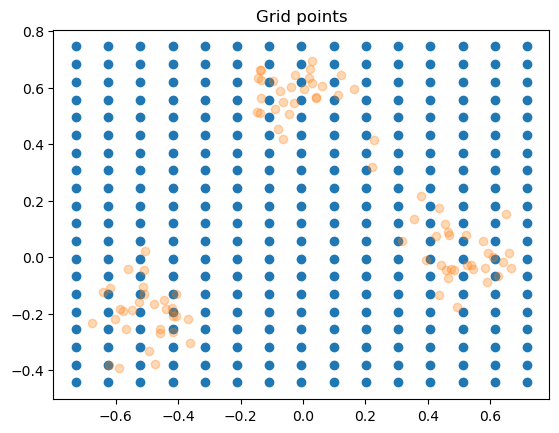

In [170]:
# get vertices of rectangle that encompasses the data
a = np.min(data_shuffled, axis=0)[0] 
b = np.max(data_shuffled, axis=0)[0]
c = np.min(data_shuffled, axis=0)[1]
d = np.max(data_shuffled, axis=0)[1]

# fill the periphery
x = np.linspace(a-0.05,b+0.05,15)
y = np.linspace(c-0.05,d+0.05,20)

#create the grid
test_x ,test_y = np.meshgrid(x,y)
plt.scatter(test_x, test_y)
plt.scatter(data[:,0],data[:,1], alpha = 0.3)
plt.title('Grid points')
test_x.shape


In [171]:
test_points = np.c_[test_x.flatten(), test_y.flatten()]
# plt.scatter(test_points[:,0],test_points[:,1]) # just to make sure the concat was correct
# plt.scatter(data[:,0],data[:,1], alpha = 0.3)
test_points.shape

(300, 2)

In [172]:
distances_squared_test = pdist(test_points, 'sqeuclidean')    
distances_matrix_test = squareform(distances_squared_test)   


# Compute the symmetric kernel matrix.
K_test = np.exp(-(1/sigma**2) * distances_matrix_test)


#center the matrix 
n = K_test.shape[0]
one_n = np.ones((n, n)) / n
K_centered_test = K_test - np.dot(one_n, K_test) - np.dot(K_test, one_n) + np.dot(np.dot(one_n, K_test), one_n)

In [173]:
test_features = np.dot(K_centered_test[:,:90], sorted_eigenvectors[:,:8])
test_features.shape

(300, 8)

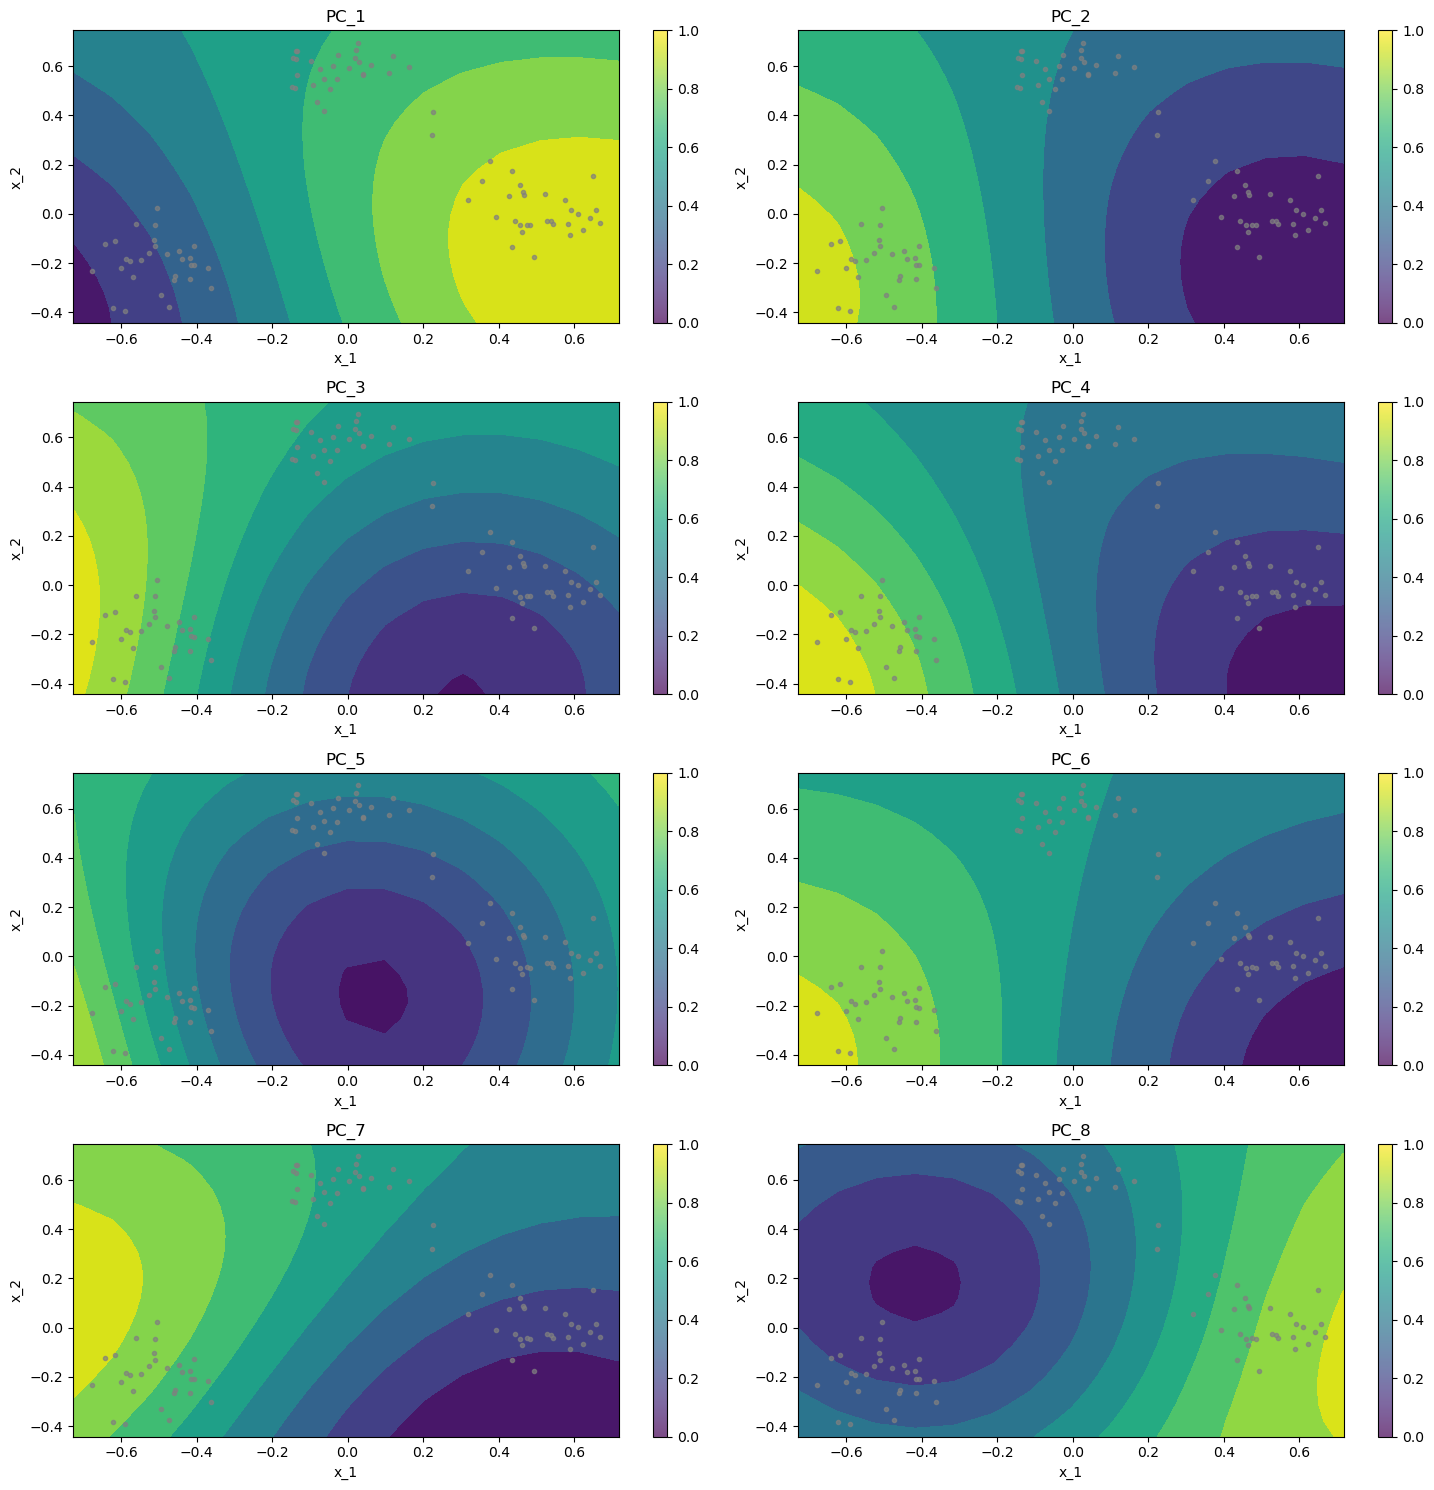

In [174]:
plt.figure(figsize = (15, 15))

for i in range(8):

    plt.subplot(4, 2, i + 1)
    plt.contourf(test_x, test_y , test_features[:, i].reshape(y.shape[0], x.shape[0]),levels = 8)
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='grey', alpha=0.7)
    plt.colorbar()

    plt.title("PC_{}".format(i + 1))
    plt.xlabel("x_1")
    plt.ylabel("x_2")
plt.tight_layout()

### The different PCs cluster the data, some show where the clusters are, while others show where there should not be data (spaces between clusters). it is used instead of PCA when the data can be mapped to a lower dimensional non-linear subspace, in which case Kernel PCA is used instead of PCA, and can be used for dimensionalty reduction for example